In [55]:
**********************************************
****
**** OPENING DATA FOR Rachel Anderson
****
**********************************************
set more off
clear all
macro drop _all
clear matrix
drop _all 
cap log close
estimates clear

import delimited "/Users/rachelanderson/Dropbox (Princeton)/Research_V2/descriptive_solar/code/analysis/stata-policy-analysis/state_policy_panel.csv"

**********************************************
****
**** Encode group identifiers
****
**********************************************

egen state_code = group(state)
egen region_code = group(region)

**********************************************
****
**** Outcomes
****
**********************************************


// Create log outcome variables
gen log_n_plants = log(n_plants+1)
gen log_ac_cap = log(ac_cap_added + 1)

gen log_n_plants_qf = log(n_plants_qf + 1)
gen log_ac_cap_qf = log(ac_cap_added_qf + 1)

gen log_cum_ac_cap = log(cum_ac_cap_added + 1)
gen log_cum_n_plants = log(cum_n_plants + 1)

gen cum_avg_cap = cum_ac_cap_added/cum_n_plants
replace cum_avg_cap = 0 if cum_avg_cap == .
replace avg_cap_ac = 0 if avg_cap_ac == .

gen log_cum_avg_plant = log(cum_avg_cap + 1)
label variable log_cum_avg_plant "Log Avg. Size"

label variable log_cum_ac_cap "Log Total Capacity"
label variable log_ac_cap "Log Capacity Additions"

label variable log_n_plants "Log # Plants Added"
label variable log_cum_n_plants "Log Total # Plants"

label variable cum_avg_cap "Avg. plant size"
label variable avg_cap_ac "Avg. new plant size"

gen log_avg_cap = log(avg_cap_ac + 1)
label variable log_avg_cap "Log avg. size"

// Create non-QF variables for robustness checks
global outcomes "n_plants ac_cap_added"
foreach i in $outcomes{
    gen `i'_non_qf = `i' - `i'_qf
    gen log_`i'_non_qf = log(`i'_non_qf + 1)
}

**********************************************
****
**** Controls
****
**********************************************

gen log_acres = log(acres)
gen log_cf = log(nrel_cap_factor)

global controls "log_cf log_acres log_pop retail_choice log_gdp"
global retail_controls "p_public_sales_2016 p_retail_sales_2016"

label variable log_cf "Log Capacity Factor"
label variable nrel_cap_factor "Capacity Factor"

label variable acres "Acres"
label variable log_acres "Log acres"

label variable p_retail_sales_2016 "% Retail Sales (2016)"
label variable p_iou_sales_2016 "% IOU Sales (2016)"
label variable retail_choice "Retail Choice?"
label variable iso_rto_dummy "ISO/RTO?"

label variable log_pop "Log population"
label variable log_sales "Log retail sales"

gen log_gdp = log(gdp)
label variable log_gdp "Log GDP"










(65 vars, 500 obs)









(252 missing values generated)

(252 real changes made)

(0 real changes made)






























In [ ]:
sort state_code year 
by state_code: gen datenum = _n 
by state_code: gen target = datenum if year == first_plant_year
egen td=min(target), by(state_code)
drop target
gen dif=datenum-td

replace dif = 0 if dif == .





(470 missing values generated)

(200 missing values generated)


(200 missing values generated)

(200 real changes made)


In [ ]:

foreach outcome in "log_n_plants log_ac_cap log_avg_cap"{
    preserve
    collapse (mean) `outcome', by(dif)
    twoway line `outcome' dif
    
    restore
}



In [40]:
restore
collapse (mean) log_n_plants, by(dif)

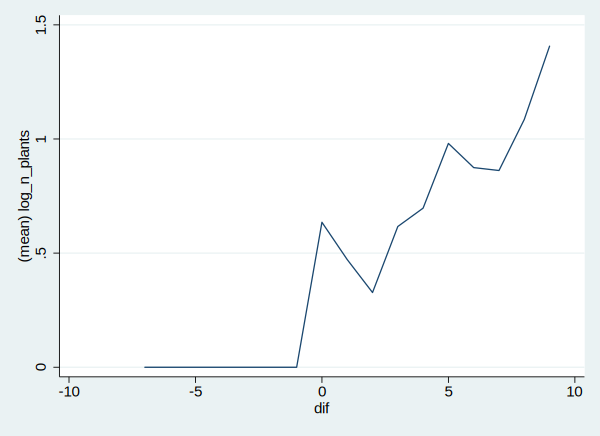

In [41]:
twoway line log_n_plants dif

In [2]:
gen n_years_rps = year - first_yr_tot_rps_lbl
gen n_years_srps = year - first_yr_solar_rps_manual
gen n_years_any_plant = year - first_plant_year
gen n_years_qf = year - first_qf_year

global n_years "n_years_rps n_years_srps n_years_any_plant n_years_qf"

foreach i in $n_years{
    replace `i' = 0 if `i' < 0 | `i' == .
}

egen n_plant_years = group(n_years_any_plant), label







(29 real changes made)
(28 real changes made)
(94 real changes made)
(129 real changes made)



In [145]:
gen any_solar = 0
replace any_solar = 1 if year > first_plant_year



(376 real changes made)


In [146]:
reghdfe log_ac_cap i.n_plant_years log_pop log_gdp itc_dummy ptc_dummy, absorb(state_code year) cluster(state_code)

(MWFE estimator converged in 2 iterations)
note: 29.n_plant_years omitted because of collinearity

HDFE Linear regression                            Number of obs   =        500
Absorbing 2 HDFE groups                           F(  31,     49) =     209.23
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.6968
                                                  Adj R-squared   =     0.6301
                                                  Within R-sq.    =     0.1365
Number of clusters (state_code) =         50      Root MSE        =     1.2810

                             (Std. Err. adjusted for 50 clusters in state_code)
-------------------------------------------------------------------------------
              |               Robust
   log_ac_cap |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+-------------------------------------------------------

In [3]:
xtset state_code year
xtreg log_n_plants log_pop log_gdp itc_dummy ptc_dummy n_years_any_plant n_years_qf i.year, fe cluster(state_code)


       panel variable:  state_code (strongly balanced)
        time variable:  year, 2010 to 2019
                delta:  1 unit


Fixed-effects (within) regression               Number of obs     =        500
Group variable: state_code                      Number of groups  =         50

R-sq:                                           Obs per group:
     within  = 0.2882                                         min =         10
     between = 0.0538                                         avg =       10.0
     overall = 0.0291                                         max =         10

                                                F(15,49)          =      20.90
corr(u_i, Xb)  = -0.9987                        Prob > F          =     0.0000

                             (Std. Err. adjusted for 50 clusters in state_code)
-------------------------------------------------------------------------------
              |               Robust
 log_n_plants |      Coef.   Std. Err.      t    P>|


       panel variable:  state_code (strongly balanced)
        time variable:  year, 2010 to 2019
                delta:  1 unit


Fixed-effects (within) regression               Number of obs     =        350
Group variable: state_code                      Number of groups  =         50

R-sq:                                           Obs per group:
     within  = 0.2275                                         min =          7
     between = 0.1702                                         avg =        7.0
     overall = 0.1087                                         max =          7

                                                F(4,49)           =      11.37
corr(u_i, Xb)  = -1.0000                        Prob > F          =     0.0000

                             (Std. Err. adjusted for 50 clusters in state_code)
-------------------------------------------------------------------------------
              |               Robust
   log_ac_cap |      Coef.   Std. Err.      t    P>|

In [87]:
xtset state_code year
xtreg log_ac_cap_qf $n_years, fe cluster(state_code)


       panel variable:  state_code (strongly balanced)
        time variable:  year, 2010 to 2019
                delta:  1 unit


Fixed-effects (within) regression               Number of obs     =        500
Group variable: state_code                      Number of groups  =         50

R-sq:                                           Obs per group:
     within  = 0.1276                                         min =         10
     between = 0.0208                                         avg =       10.0
     overall = 0.0089                                         max =         10

                                                F(4,49)           =      12.62
corr(u_i, Xb)  = -1.0000                        Prob > F          =     0.0000

                             (Std. Err. adjusted for 50 clusters in state_code)
-------------------------------------------------------------------------------
              |               Robust
log_ac_cap_qf |      Coef.   Std. Err.      t    P>|

In [17]:
restore

In [22]:
list if n_plants > 0 & year < first_plant_year 

In [8]:
collapse (mean) n_plants, by(dif)


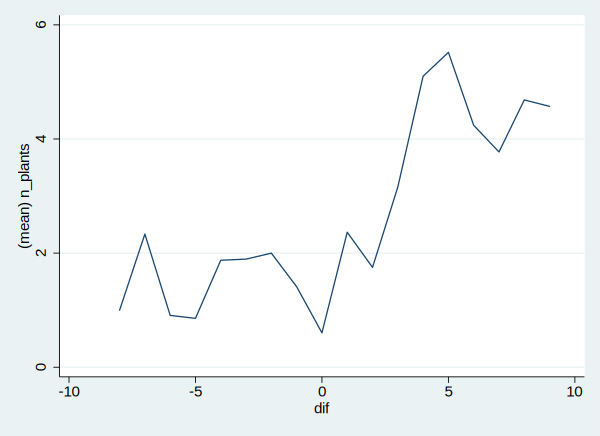

In [15]:
twoway line n_plants dif

In [11]:
sum


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         dif |         18          .5    5.338539         -8          9
    n_plants |         18    2.669153    1.597354   .6030535   5.518518


In [213]:
help esplot


version 0.9.8

esplot -- event study plots
---------------------------

Syntax
------

        esplot varname [if] [in] [weight], event(varname [, suboptions])
        [options ]

    or

        esplot outcome [if] [in] [weight], event(varname [, suboptions])
        [options ]
        Documentation

Core Syntax 
------------

    esplot can be called one of two ways.

    1. with an event-time variable:

   . esplot <outcome> <event_time> [, options]

    2. or with an event indicator (on panel data):

    esplot <outcome>, event(<event_indicator> [, options])

Options
-------

    General Options

    compare(<event_indicator> [, options]) Only available when using the
    event(<event_indicator>) syntax. Plot the difference between the
    event-time coefficents associated with the event in event and the event
    given in {it:compare xample, esplot infected, event(treatment)
    compare(placebo) will estimate event-time coefficents around the treatment
    event and the placebo e

    quasi-random rotation of managers across units to identify the effects of
    manager gender on the career progression of male and female employees. For
    example, they consider the effect of switching from a female manager to
    male m it:relative} to switching from a female manager to another female
    manager. This would be coded as ... event(to_male_manager)
    compare(to_female_manager).... By including the comparison event, the
    authors adjust for the effects of switching ma it:per se} and isolate the
    differences associated with the gender of the manager.

        compare and difference can be used together. See Cullen &
        Perez-Truglia, 2019 for an in depth discussion, examples, and
        econometric specification

    Efficiently Estimating Many Event-Study Plots: save, replace, nogen

    event and compare have the sub-options save, nogen, and replace, which are
    of primary use when estimating multiple specifications, or multiple
    outcomes. These 

In [185]:
collapse (mean) cum_ac_cap_added, by(diff_yr)

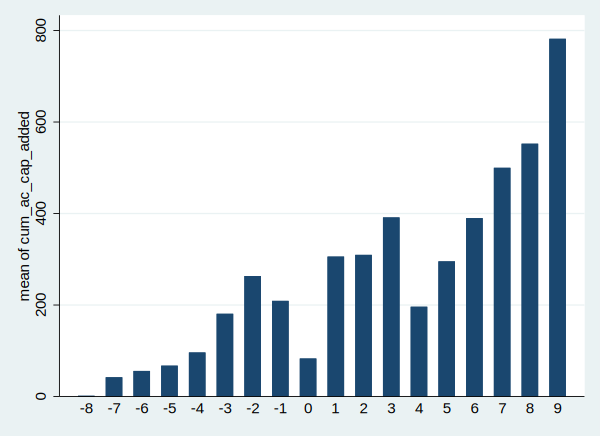

In [194]:
graph bar cum_ac_cap_added, over(diff_yr)

In [170]:
xtset state_code year
eststo: xtreg cum_ac_cap_added i.diff_yr i.year, fe cluster(state_code)


       panel variable:  state_code (strongly balanced)
        time variable:  year, 2010 to 2019
                delta:  1 unit


Fixed-effects (within) regression               Number of obs     =        500
Group variable: state_code                      Number of groups  =         50

R-sq:                                           Obs per group:
     within  = 0.1490                                         min =         10
     between = 0.0189                                         avg =       10.0
     overall = 0.0163                                         max =         10

                                                F(25,49)          =          .
corr(u_i, Xb)  = -0.2511                        Prob > F          =          .

                            (Std. Err. adjusted for 50 clusters in state_code)
------------------------------------------------------------------------------
             |               Robust
cum_ac_cap~d |      Coef.   Std. Err.      t    P>|t|  

In [160]:
xtset state_code year
eststo: xtreg cum_ac_cap_added i.diff_yr i.year, fe cluster(state_code)


       panel variable:  state_code (strongly balanced)
        time variable:  year, 2010 to 2019
                delta:  1 unit

variable diff_yr not found


r(111);
r(111);


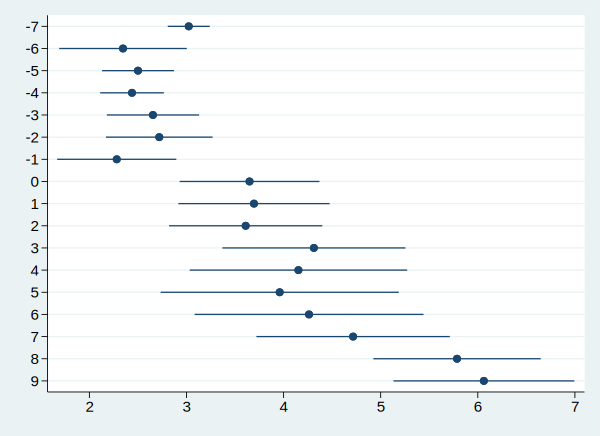

In [72]:
coefplot, drop(_cons *.year)